In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import joblib
import os
import csv
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [44]:
dataset=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_AGTTC.csv')
dataset

,indx,kmer,mean_1,mean_2,mean_3,mean_4,mean_5,std_1,std_2,std_3,...,mdintense_2,mdintense_3,mdintense_4,mdintense_5,L-1,L-2,L-3,L-4,L-5,label
0,260,AGTTC,0.513199,0.397293,-0.850444,-0.837177,-0.786233,0.047088,0.272815,0.031234,...,0.471305,-0.846254,-0.839970,-0.768751,6,81,6,15,104,1
1,259,AGTTC,0.589209,0.568374,-0.717482,-0.762448,-0.789418,0.062266,0.080098,0.038712,...,0.579342,-0.727349,-0.763294,-0.799239,6,32,6,15,90,1
2,243,AGTTC,0.458838,0.109656,-0.797939,-0.820008,-0.756034,0.149853,0.419986,0.034345,...,0.190347,-0.796560,-0.817250,-0.755180,13,6,6,33,63,1
3,260,AGTTC,0.457595,0.472804,-0.688376,-0.681815,-0.679743,0.060894,0.174125,0.025067,...,0.513802,-0.686393,-0.686393,-0.696311,6,78,6,13,108,1
4,260,AGTTC,0.528384,0.423719,-0.713185,-0.825872,-0.800544,0.029393,0.277885,0.162593,...,0.522379,-0.768558,-0.826600,-0.792575,6,51,6,11,108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,260,AGTTC,0.787659,0.405793,-0.611869,-0.739305,-0.605124,0.169036,0.279195,0.138040,...,0.463995,-0.667700,-0.744655,-0.604325,32,14,6,11,17,0
2629,161,AGTTC,0.396310,0.499622,-0.619268,-0.546544,-0.762006,0.090910,0.031997,0.130815,...,0.500937,-0.642935,-0.607435,-0.786905,39,6,6,16,16,0
2630,240,AGTTC,0.589990,0.614284,-0.632994,-0.789089,-0.753708,0.172348,0.280588,0.188418,...,0.688070,-0.685807,-0.796713,-0.751445,6,40,6,19,6,0
2631,260,AGTTC,0.661435,0.551367,-0.694797,-0.734620,-0.571503,0.110638,0.231089,0.049018,...,0.548295,-0.676666,-0.739763,-0.576580,33,34,6,11,6,0


In [45]:
X = dataset.iloc[:, 2:-1].values
y = dataset. iloc [:, -1].values

In [46]:
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')

Matrix of features
[[  0.51319872   0.39729262  -0.8504436  ...   6.          15.
  104.        ]
 [  0.58920944   0.56837391  -0.7174823  ...   6.          15.
   90.        ]
 [  0.45883765   0.10965631  -0.79793931 ...   6.          33.
   63.        ]
 ...
 [  0.58998992   0.61428362  -0.6329943  ...   6.          19.
    6.        ]
 [  0.66143511   0.55136657  -0.69479697 ...   6.          11.
    6.        ]
 [  0.69572369   0.68914384  -0.43029948 ...   6.          20.
   31.        ]]
--------------------------------------------------
Target Variable
[1 1 1 ... 0 0 0]


In [47]:

def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1','roc_auc']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
        
        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean(),
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean(),
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "Mean Validation AUROC score": results['test_roc_auc'].mean()
             
              
              }
    
    
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()    

In [48]:
XGB_model = XGBClassifier(learning_rate=0.01,
                      n_estimators=10,           # 树的个数-10棵树建立xgboost
                      max_depth=4,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=27,           # 随机数
                      slient = 0)
XGB_result = cross_validation(XGB_model, X, y, 5)
print(XGB_result)

[16:06:06] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_btree", "slient" } are not used.

[16:06:06] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_btree", "slient" } are not used.

[16:06:06] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_btree", "slient" } are not used.

[16:06:06] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_btree", "slient" } are not used.

[16:06:06] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_btree", "slient" } are not used.

{'Training Accuracy scores': array([0.98385565, 0.98338082, 0.98290598, 0.98386331, 0.98623636]), 'Mean Training Accuracy': 0.9840484235833074, 'Training Precision scores': array([0.99099099, 0.99095023, 0.99541284, 0.98230088, 0.99118943]), 'Mean Training Precision': 0.9901688747081121, 'Training Recall scores': array([0.87301587, 0.86904762, 0.86111111, 0.88095238, 0.89285714]), 'Mean Training Recall': 0.8753968253968255, 'Training F1 scores': array([0.92827004, 0.92600423, 0.92

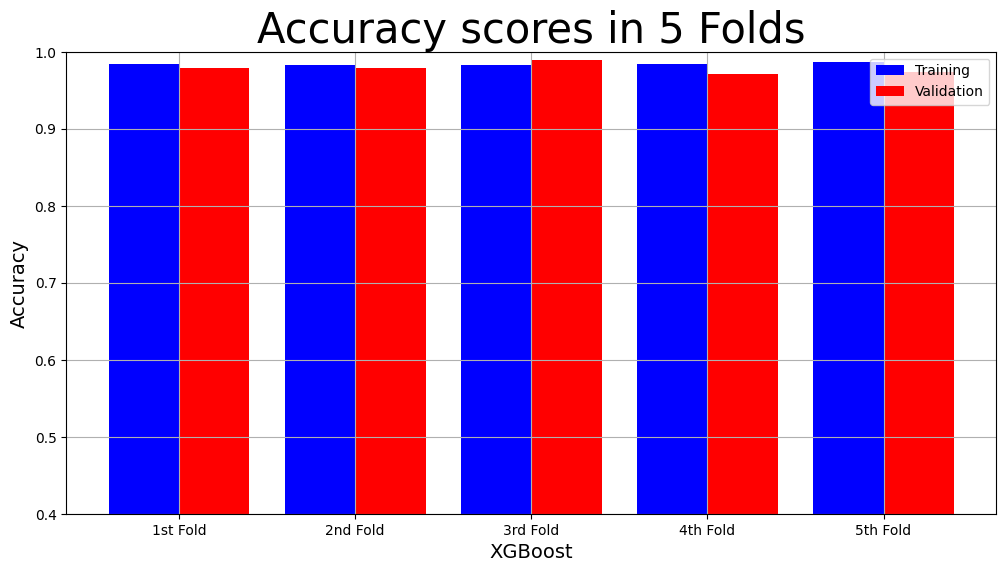

In [39]:
model_name = "XGBoost"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            XGB_result["Training Accuracy scores"],
            XGB_result["Validation Accuracy scores"])


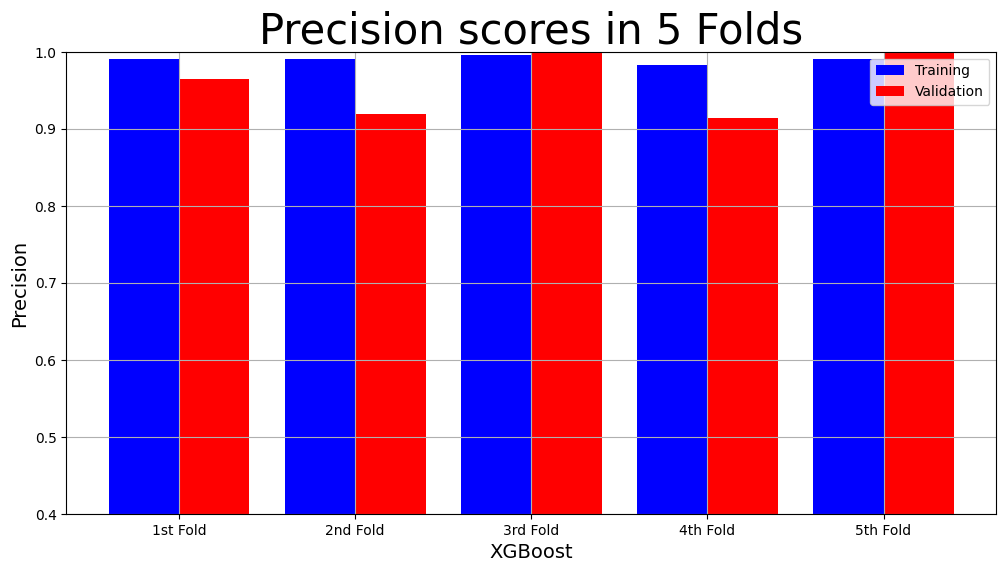

In [40]:
model_name="XGBoost"
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            XGB_result["Training Precision scores"],
            XGB_result["Validation Precision scores"])

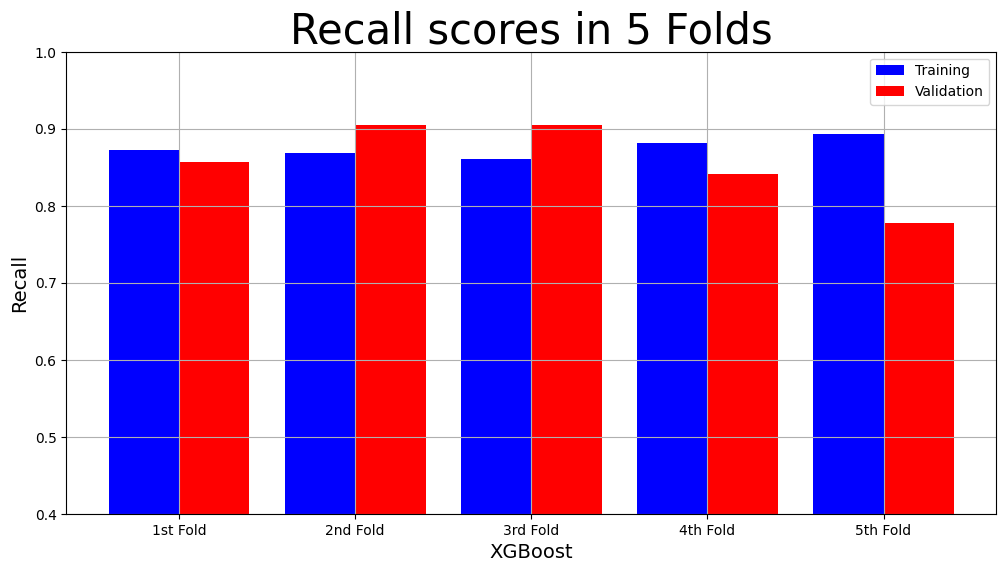

In [19]:
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            XGB_result["Training Recall scores"],
            XGB_result["Validation Recall scores"])

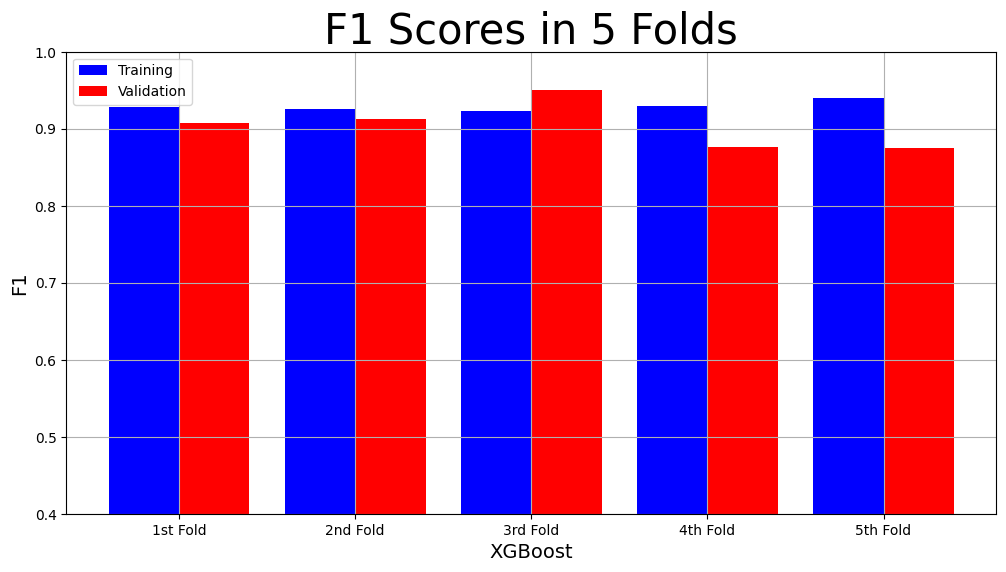

In [20]:
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            XGB_result["Training F1 scores"],
            XGB_result["Validation F1 scores"])

References:

[1] https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

[2] https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

[3] https://scipy-lectures.org/packages/scikit-learn/index.html

[4] https://www.kaggle.com/code/prashant111/xgboost-k-fold-cv-feature-importance

[5] https://stackoverflow.com/questions/40263117/cross-validation-with-sklearn-in-keras
